In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
import numpy as np

numOfY  = list(np.zeros(3))
# print(np.zeros(3))
X = []
Y = []
for i in range(3):
    X.append(np.fromfile('vals%d.dat' % i, dtype=np.uint16).reshape(-1, 8))
    Y.append(i + np.zeros(X[-1].shape[0]))
    numOfY[i]  = X[-1].shape[0]


In [3]:
X

[array([[ 22,  57, 123, 108,  45,  40,  25,  20],
        [ 25,  65, 142, 123,  44,  44,  27,  23],
        [ 27,  64, 133, 137,  45,  39,  26,  23],
        [ 28,  68, 149, 124,  42,  39,  25,  25],
        [ 29,  67, 149, 113,  42,  36,  25,  25],
        [ 30,  68, 164, 123,  40,  35,  25,  26],
        [ 30,  62, 166, 124,  41,  30,  23,  24],
        [ 30,  64, 202, 133,  41,  31,  24,  23],
        [ 31,  65, 195, 135,  49,  33,  25,  22],
        [ 30,  64, 206, 140,  47,  31,  25,  22],
        [ 30,  64, 208, 132,  46,  30,  24,  22],
        [ 31,  66, 198, 122,  46,  34,  24,  22],
        [ 29,  64, 164, 105,  46,  35,  25,  23],
        [ 28,  59, 156,  94,  35,  34,  23,  21],
        [ 28,  61, 149, 100,  36,  36,  23,  20],
        [ 27,  58, 154, 128,  40,  37,  23,  19],
        [ 24,  55, 156, 132,  50,  31,  22,  22],
        [ 21,  52, 151, 123,  47,  29,  21,  20],
        [ 21,  57, 148, 128,  46,  29,  21,  21],
        [ 20,  58, 137, 119,  47,  28,  22,  21],


In [4]:
df0=pd.DataFrame(X[0])
df1=pd.DataFrame(X[1])
df2=pd.DataFrame(X[2])

df0

,0,1,2,3,4,5,6,7
0,22,57,123,108,45,40,25,20
1,25,65,142,123,44,44,27,23
2,27,64,133,137,45,39,26,23
3,28,68,149,124,42,39,25,25
4,29,67,149,113,42,36,25,25
...,...,...,...,...,...,...,...,...
95,21,67,156,147,48,36,23,21
96,22,63,158,129,39,32,24,21
97,22,65,146,118,39,34,23,20
98,22,60,168,129,40,35,24,21


In [5]:
df0['class']=0
df1['class']=1
df2['class']=2


In [6]:
df=pd.concat([df0, df1, df2], axis=0)
df

,0,1,2,3,4,5,6,7,class
0,22,57,123,108,45,40,25,20,0
1,25,65,142,123,44,44,27,23,0
2,27,64,133,137,45,39,26,23,0
3,28,68,149,124,42,39,25,25,0
4,29,67,149,113,42,36,25,25,0
...,...,...,...,...,...,...,...,...,...
195,221,98,188,148,109,112,68,180,2
196,213,74,172,129,111,116,68,181,2
197,196,68,178,137,133,122,64,173,2
198,197,68,176,141,156,117,69,182,2


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

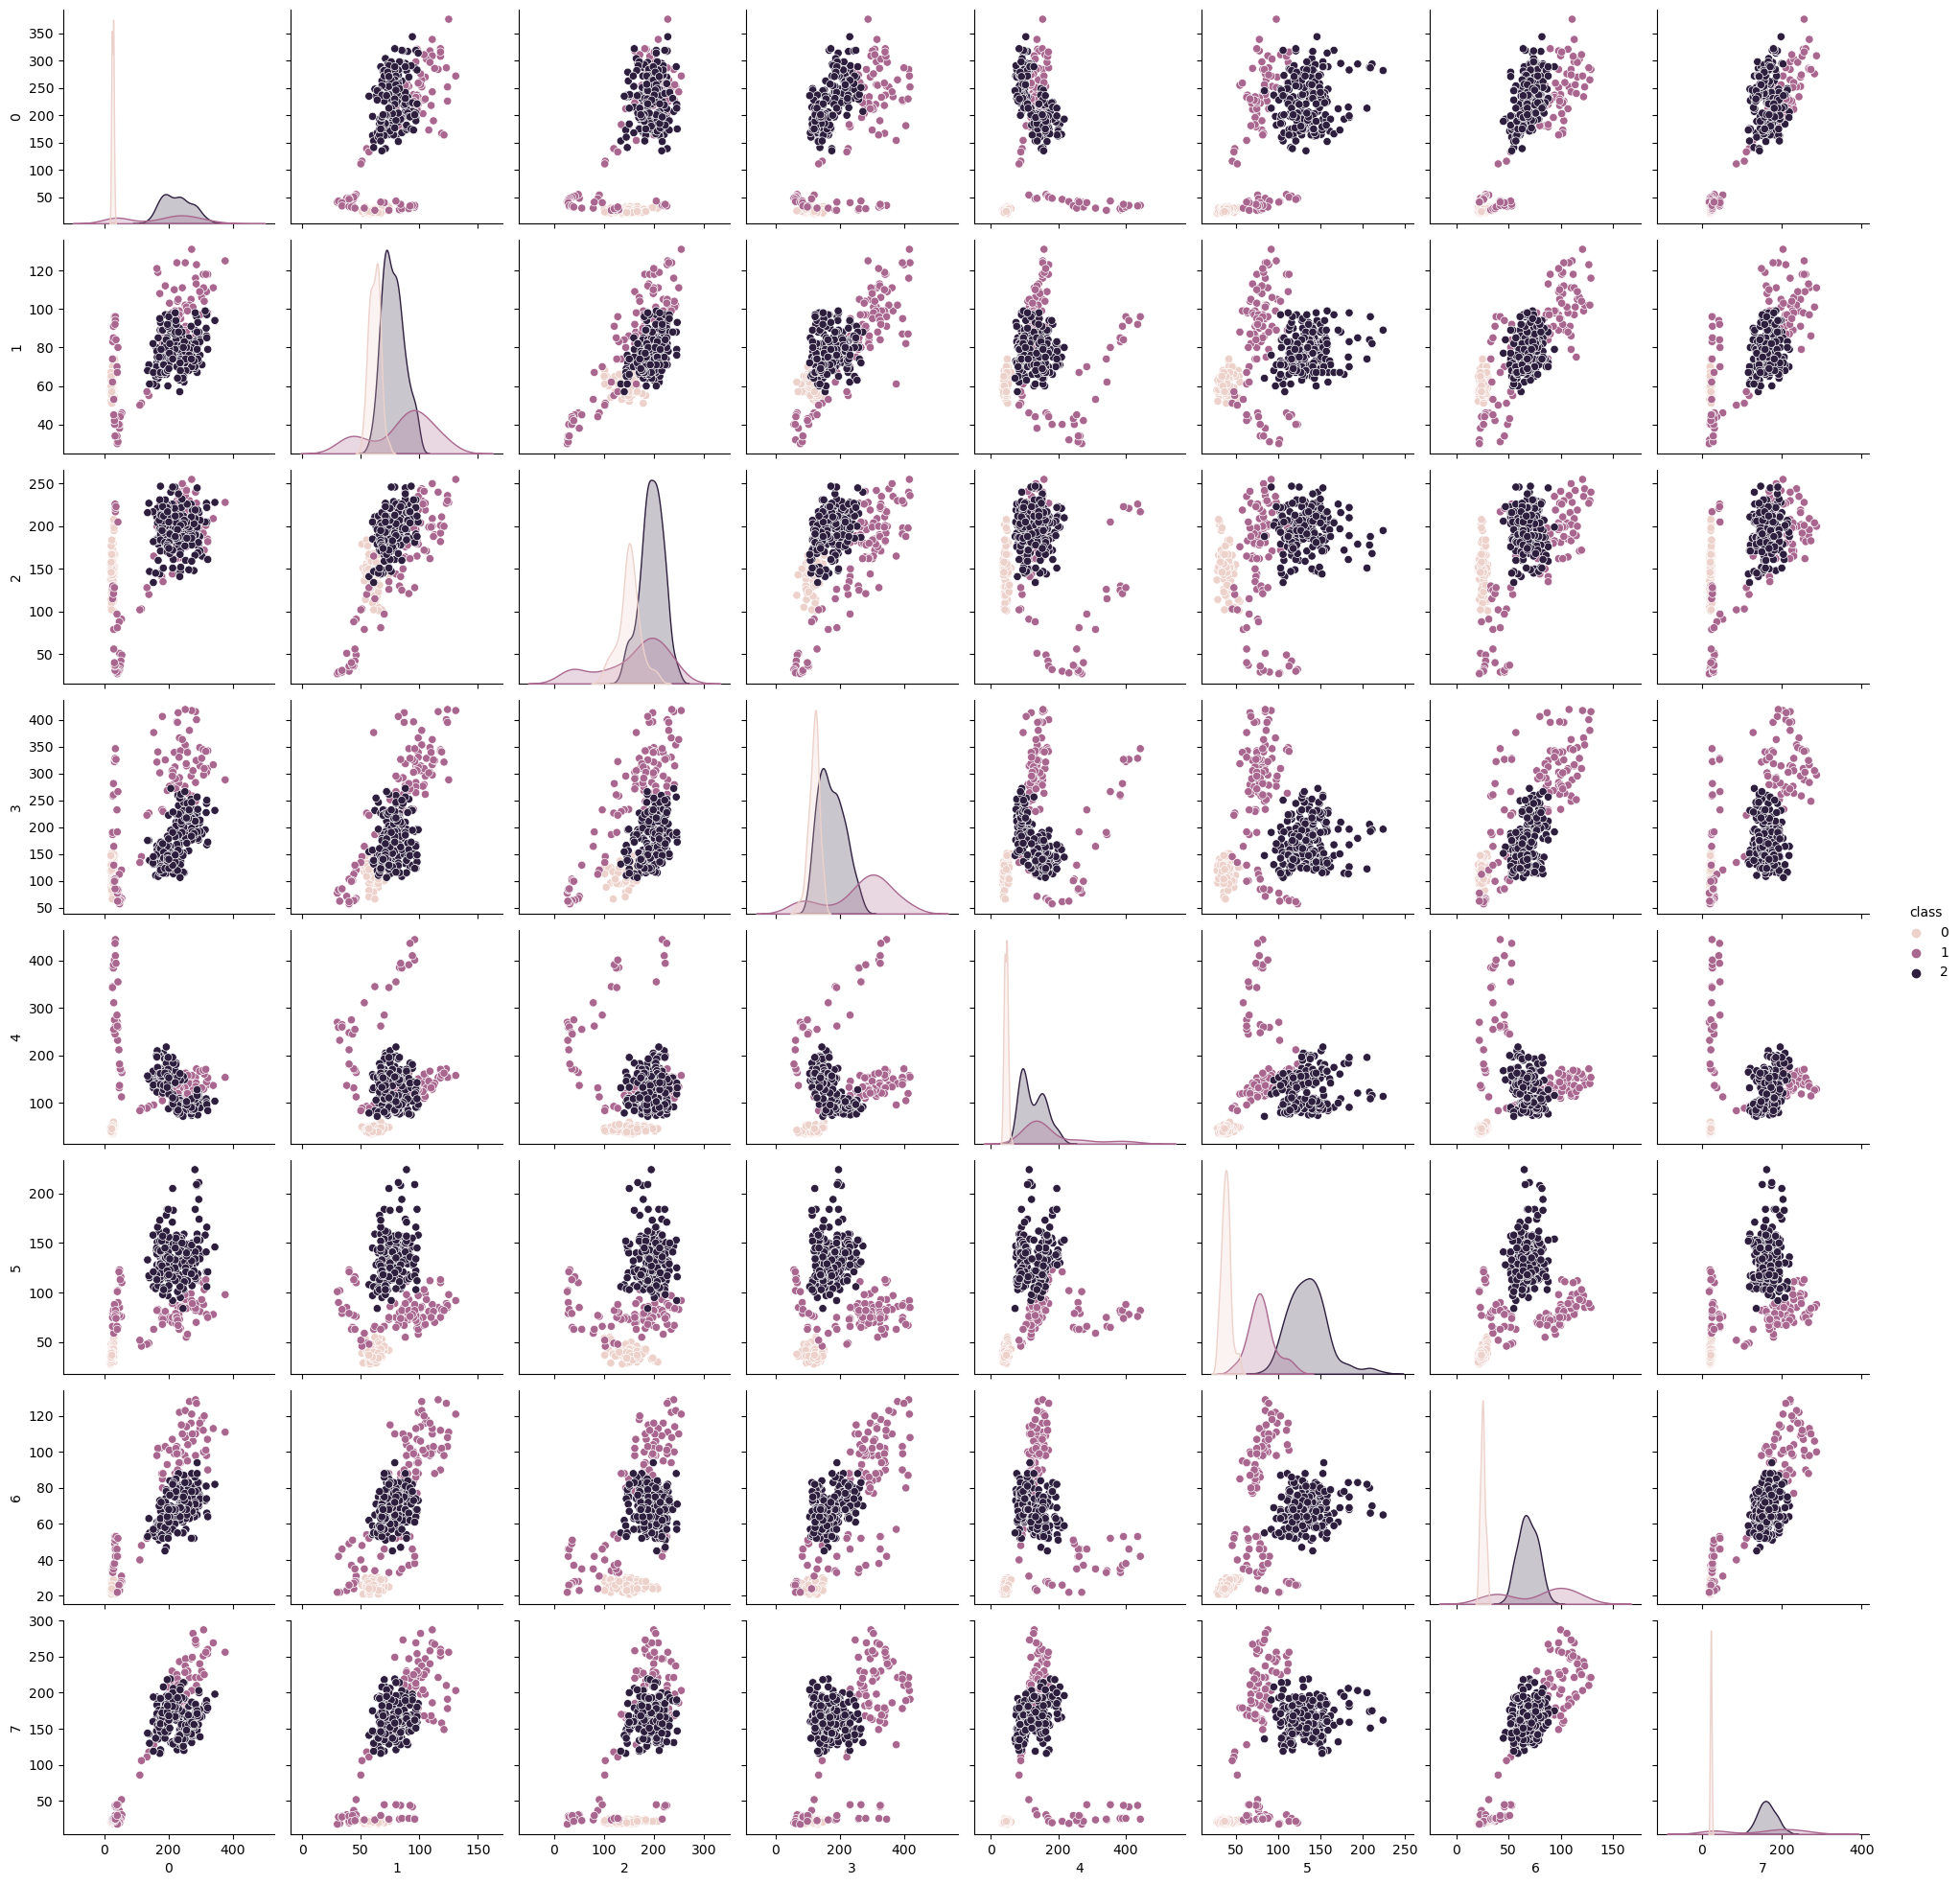

In [8]:
sns.pairplot(df, hue = 'class', kind='scatter')
plt.show()

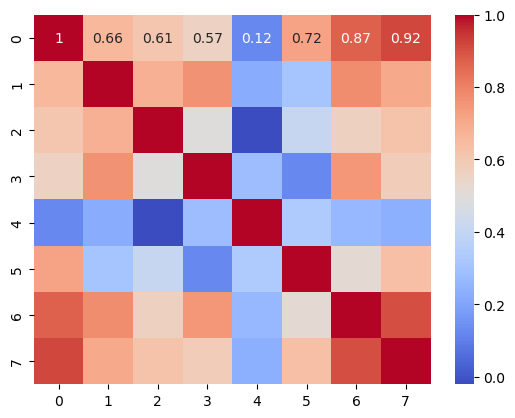

In [9]:
sns.heatmap(df.drop('class', axis=1).corr(), annot = True, cmap='coolwarm')
plt.show()

In [10]:
labels=df['class']
sensors=df.drop('class', axis=1)
# sensors

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(sensors, labels, test_size=0.3, random_state=1)

In [12]:
X_train

,0,1,2,3,4,5,6,7
102,206,79,188,164,177,136,70,219
39,25,62,144,97,40,37,25,22
97,37,84,223,326,394,74,53,44
35,261,82,195,215,90,116,83,153
117,221,88,197,132,168,133,81,165
...,...,...,...,...,...,...,...,...
54,248,73,179,200,80,103,87,192
72,24,55,142,118,42,41,27,23
195,221,98,188,148,109,112,68,180
34,247,77,194,215,90,113,77,156


In [13]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=5)

In [14]:
Y_pred=forest.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

1.0

In [16]:
forest.feature_importances_
# sensors 4,5,6 affects the most to result classification
# while sensor 1,2 almost have no effects

array([0.01332963, 0.08850529, 0.01909912, 0.07991864, 0.19347775,
       0.37530389, 0.09428499, 0.13608068])